# DATA EXPLORATION

This analysis focuses on explore the dataset, specifically in the followings: 

    1. Develop a deep understanding of what's going on the data.

    2. Look for null values.

    3. Explore the distributions of every attribute

    4. Make some interesting questions to go deeper in next steps
    
Note: obviously there is a better way to create a numerated list here, but I don't want to investigate know

# 1. Quick view

In [2]:
#importing the libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [3]:
#I am using the bank-additional-full dataset!

#one of the several ways to load data, we can specify a delimiter
df = pd.read_csv('bank.csv',delimiter=';')

In [3]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Looking for nulls

In [16]:
df.isnull().sum(axis = 0)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**Fortunately we don't have any nulls**

In [17]:
df.isna().sum(axis = 0)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**No nan either**

# 2. Distributions and counts

### ----- Label to predict (y) ----

In [4]:
y = df['y']
y.describe()

count     41188
unique        2
top          no
freq      36548
Name: y, dtype: object

In [5]:
y.unique()

array(['no', 'yes'], dtype=object)

In [6]:
y.tail()

41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, dtype: object

In [7]:
y_encode = pd.Series(le.fit_transform(y))

### Verify if the output labels are balanced

Very important thing to do and there are many ways to solve it: undersampling, oversampling,...

### -----Bank client data-----

## Age (age)

**General Description**

In [30]:
age = df['age']
age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

**Median, mean and mode to identify presence outliers**

In [38]:
print ('mean= ',age.mean())
print('median= ',age.median())
print('mode= ',age.mode())

mean=  40.02406040594348
median=  38.0
mode=  0    31
dtype: int64


It seems there is no presence of outliers

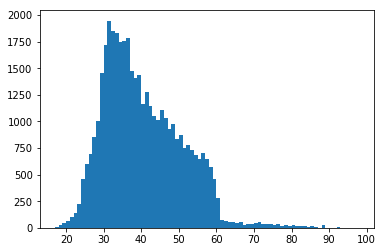

In [49]:
plt.hist(age,age.max()-age.min())
plt.show()

**Relation with y_cat**

In [84]:
age_y = pd.concat([age,y_encode.rename('y')],axis = 1)
age_y.head()

,age,y
0,56,0
1,57,0
2,37,0
3,40,0
4,56,0


In [163]:
age_y_counts = age_y.groupby('age').agg({'y': [np.count_nonzero],'age': [np.count_nonzero]})
age_y_counts.head()

,y,age
,count_nonzero,count_nonzero
age,,
17,2,5
18,12,28
19,20,42
20,23,65
21,29,102


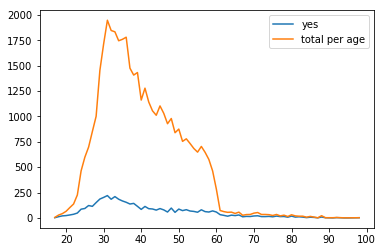

In [165]:
plt.plot(age_y_counts['y'])
plt.plot(age_y_counts['age'])
plt.legend(['yes', 'total per age'], loc=1)
plt.show()

## Job (job)

In [53]:
job = df['job']
job.describe()

count      41188
unique        12
top       admin.
freq       10422
Name: job, dtype: object

In [54]:
job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

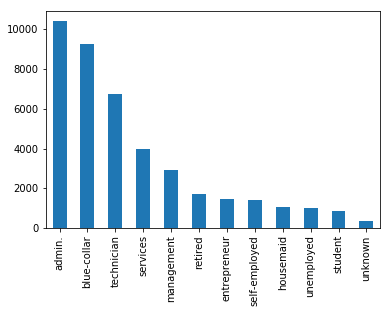

In [55]:
job.value_counts().plot(kind='bar')

## Marital (marital)

In [39]:
marital = df['marital']
marital.describe()

count       41188
unique          4
top       married
freq        24928
Name: marital, dtype: object

In [40]:
marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

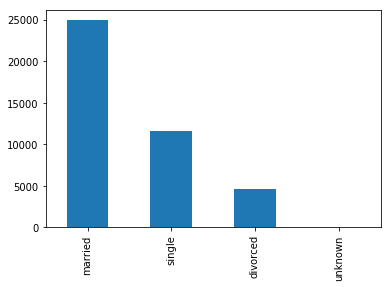

In [52]:
marital.value_counts().plot(kind='bar')

## Education (education)

In [166]:
education = df['education']
education.describe()

count                 41188
unique                    8
top       university.degree
freq                  12168
Name: education, dtype: object

In [168]:
education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

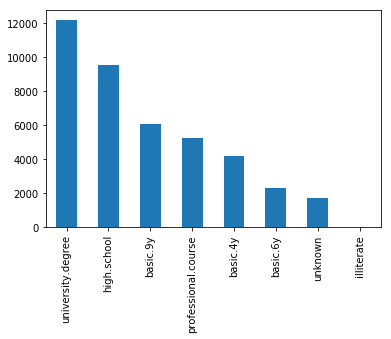

In [170]:
education.value_counts().plot(kind='bar')

##  Has credit in default? (default)

In [171]:
default = df['default']
default.describe()

count     41188
unique        3
top          no
freq      32588
Name: default, dtype: object

In [172]:
default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

no         32588
unknown     8597
yes            3
Name: default, dtype: int64


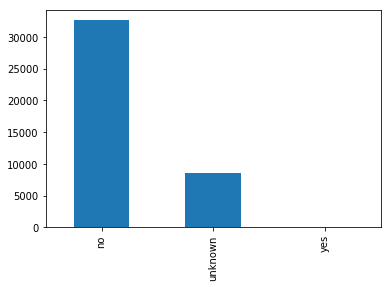

In [174]:
default.value_counts().plot(kind='bar')
print(default.value_counts())

**Maybe this attribute is not that relevant or there is something magic in there**

## Has housing loan? (housing)

In [175]:
housing = df['housing']
housing.describe()

count     41188
unique        3
top         yes
freq      21576
Name: housing, dtype: object

In [176]:
housing.unique()

array(['no', 'yes', 'unknown'], dtype=object)

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


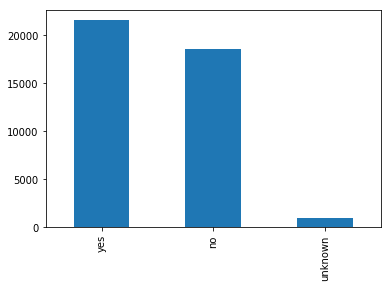

In [177]:
housing.value_counts().plot(kind='bar')
print(housing.value_counts())

## Has personal loan? (loan)

In [178]:
loan = df['loan']
loan.describe()

count     41188
unique        3
top          no
freq      33950
Name: loan, dtype: object

In [179]:
loan.unique()

array(['no', 'yes', 'unknown'], dtype=object)

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


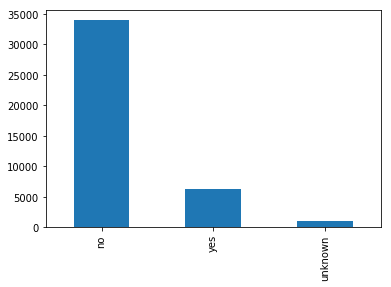

In [180]:
loan.value_counts().plot(kind='bar')
print(loan.value_counts())

## Contact communication type (contact)

In [181]:
contact = df['contact']
contact.describe()

count        41188
unique           2
top       cellular
freq         26144
Name: contact, dtype: object

In [182]:
contact.unique()

array(['telephone', 'cellular'], dtype=object)

cellular     26144
telephone    15044
Name: contact, dtype: int64


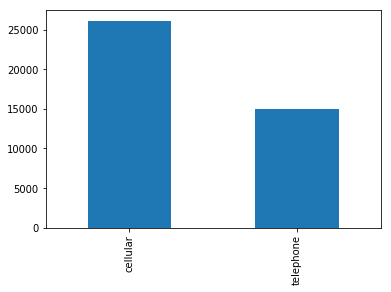

In [184]:
contact.value_counts().plot(kind='bar')
print(contact.value_counts())

## Last contact month of year (month)

In [185]:
month = df['month']
month.describe()

count     41188
unique       10
top         may
freq      13769
Name: month, dtype: object

In [186]:
month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


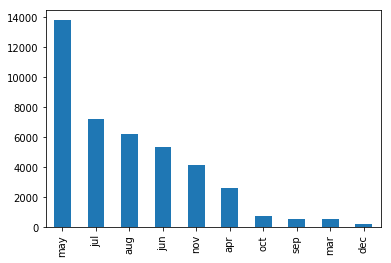

In [187]:
month.value_counts().plot(kind='bar')
print(month.value_counts())

## Last contact day of the week (day_of_week)

In [188]:
day_of_week = df['day_of_week']
day_of_week.describe()

count     41188
unique        5
top         thu
freq       8623
Name: day_of_week, dtype: object

In [189]:
day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


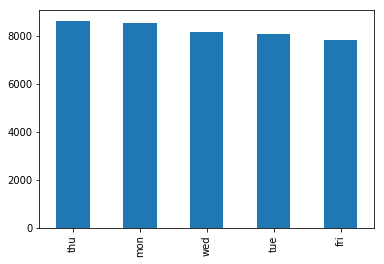

In [190]:
day_of_week.value_counts().plot(kind='bar')
print(day_of_week.value_counts())

## Last contact duration, in seconds (duration)

**Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed**

In [191]:
duration = df['duration']
duration.describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [234]:
print ('mean= ',duration.mean())
print('median= ',duration.median())
print('mode= ',duration.mode())

mean=  258.2850101971448
median=  180.0
mode=  0    85
1    90
dtype: int64


It seems there is some outliers there. Let's use a boxplot to see

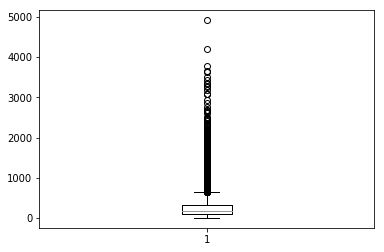

In [214]:
plt.boxplot(duration)
plt.show()

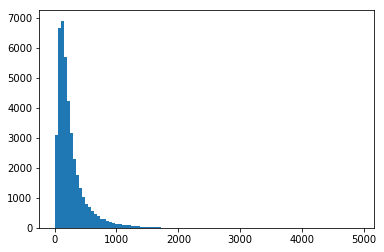

In [215]:
plt.hist(duration,100)
plt.show()

**Relation with y**

In [241]:
duration_y = pd.concat([duration,y_encode.rename('y')],axis = 1)
duration_y.head()

,duration,y
0,261,0
1,149,0
2,226,0
3,151,0
4,307,0


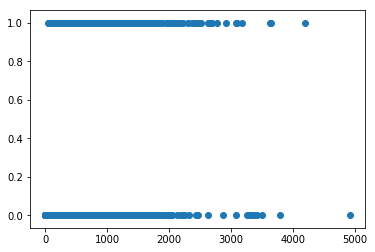

In [263]:
plt.scatter(duration,y_encode)
plt.show()

In [262]:
np.corrcoef(duration,y_encode)

array([[1.       , 0.4052738],
       [0.4052738, 1.       ]])

Let's group the to understand 

In [317]:
yes = {500:0,1000:0,1500:0,2000:0,2500:0,3000:0,3500:0,4000:0,4500:0,5000:0}
counts = {500:0,1000:0,1500:0,2000:0,2500:0,3000:0,3500:0,4000:0,4500:0,5000:0}
for index,row in duration_y.iterrows():     
        if row['duration']>=0 and row['duration']<500:
            yes[500]+=row['y']
            counts[500]+=1
        elif row['duration']>=500 and row['duration']<1000:
            yes[1000]+=row['y']
            counts[1000]+=1
        elif row['duration']>=1000 and row['duration']<1500:
            yes[1500]+=row['y']
            counts[1500]+=1
        elif row['duration']>=1500 and row['duration']<2000:
            yes[2000]+=row['y']
            counts[2000]+=1
        elif row['duration']>=2000 and row['duration']<2500:
            yes[2500]+=row['y']
            counts[2500]+=1
        elif row['duration']>=2500 and row['duration']<3000:
            yes[3000]+=row['y']
            counts[3000]+=1
        elif row['duration']>=3000 and row['duration']<3500:
            yes[3500]+=row['y']
            counts[3500]+=1
        elif row['duration']>=3500 and row['duration']<4000:
            yes[4000]+=row['y']
            counts[4000]+=1
        elif row['duration']>=4000 and row['duration']<4500:
            yes[4500]+=row['y']
            counts[4500]+=1
        elif row['duration']>=4500 and row['duration']<5000:
            yes[5000]+=row['y']
            counts[5000]+=1

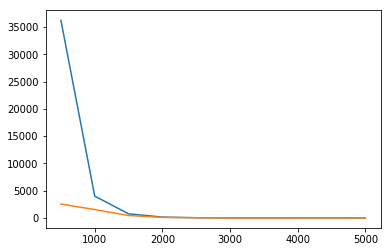

{500: 36235, 1000: 3992, 1500: 754, 2000: 147, 2500: 36, 3000: 9, 3500: 9, 4000: 4, 4500: 1, 5000: 1}
{500: 2535, 1000: 1535, 1500: 440, 2000: 92, 2500: 25, 3000: 7, 3500: 3, 4000: 2, 4500: 1, 5000: 0}


In [326]:
plt.plot(pd.Series(counts))
plt.plot(pd.Series(yes))
plt.show()
print(counts)
print(yes)

In [336]:
np.corrcoef(list(yes.keys()),list(yes.values())) #I have to check it out

array([[ 1.      , -0.758755],
       [-0.758755,  1.      ]])

In [338]:
np.corrcoef(list(counts.keys()),list(counts.values()))

array([[ 1.        , -0.57903854],
       [-0.57903854,  1.        ]])

Maybe there is some interesting correlation between duration and whether or not buy. INVESTIGATE MORE!

## Number of contacts performed during this campaign and for this client (campaign)


**numeric, includes last contact**

In [216]:
campaign = df['campaign']
campaign.describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [217]:
print ('mean= ',campaign.mean())
print('median= ',campaign.median())
print('mode= ',campaign.mode())

mean=  2.567592502670681
median=  2.0
mode=  0    1
dtype: int64


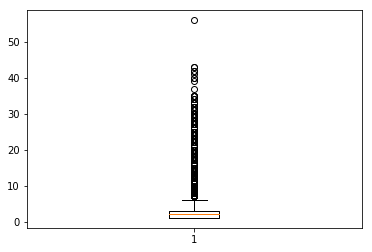

In [218]:
plt.boxplot(campaign)
plt.show()

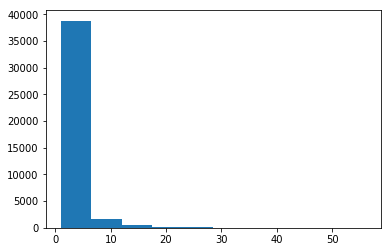

In [219]:
plt.hist(campaign)
plt.show()

In [230]:
campaign.sort_values(ascending = False)
campaign

4107     56
18728    43
13447    43
5304     42
4168     42
         ..
30144     1
30143     1
30142     1
30141     1
0         1
Name: campaign, Length: 41188, dtype: int64

Maybe there is something interesting here

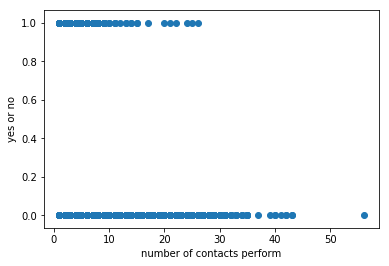

In [268]:
plt.scatter(campaign,y_encode)
plt.xlabel('number of contacts perform')
plt.ylabel('yes or no')
plt.show()

In [267]:
np.corrcoef(campaign,y_encode)

array([[ 1.        , -0.13832506],
       [-0.13832506,  1.        ]])

Let's group them

In [ ]:
yes = {0:0,10:0,20:0,30:0,40:0,50:0}

for i in 

## number of days that passed by after the client was last contacted from a previous campaign (pdays)

**numeric; 999 means client was not previously contacted**

In [231]:
pdays = df['pdays']
pdays.describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [233]:
print ('mean= ',pdays.mean())
print('median= ',pdays.median())
print('mode= ',pdays.mode())

mean=  962.4754540157328
median=  999.0
mode=  0    999
dtype: int64


## Number of contacts performed before this campaign and for this client (previous)

In [9]:
previous = df['previous']
previous.describe()

count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [11]:
print ('mean= ',previous.mean())
print('median= ',previous.median())
print('mode= ',previous.mode())

mean=  0.17296299893172767
median=  0.0
mode=  0    0
dtype: int64


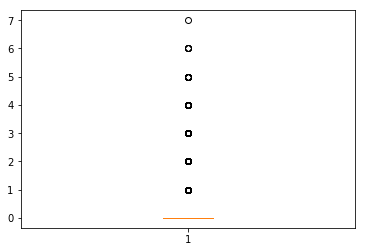

In [12]:
plt.boxplot(previous)
plt.show()

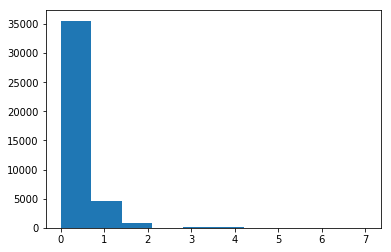

In [14]:
plt.hist(previous)
plt.show()

There are some outliers, it will be interesting to know what's going on with them

## Outcome of the previous marketing campaign (poutcome)

**categorical: 'failure','nonexistent','success'**

In [15]:
poutcome = df['poutcome']
poutcome.describe()

count           41188
unique              3
top       nonexistent
freq            35563
Name: poutcome, dtype: object

In [16]:
poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


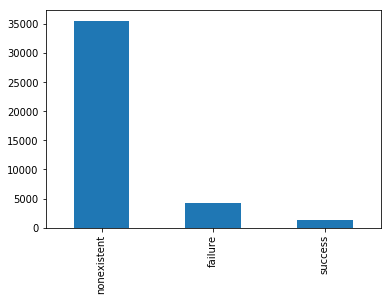

In [19]:
poutcome.value_counts().plot(kind='bar')
print(poutcome.value_counts())

Study if there is some relation with the output

### -----Social and economics context attributes-----

## Employment variation rate (emp.var.rate)

**quarterly indicator (numeric)**

In [21]:
emp_var_rate = df['emp.var.rate']
emp_var_rate.describe()

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [22]:
emp_var_rate.median()

1.1

Something rare is going on here

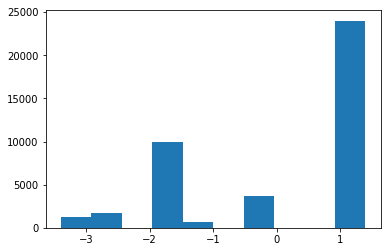

In [23]:
plt.hist(emp_var_rate)
plt.show()

## Consumer price index (cons.price.idx)

**monthly indicator (numeric)**

In [24]:
cons_price_idx = df['cons.price.idx']
cons_price_idx.describe()

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

In [25]:
cons_price_idx.median()

93.749

Everthing looks good

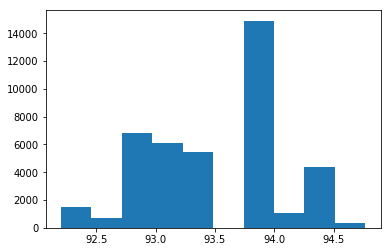

In [26]:
plt.hist(cons_price_idx)
plt.show()

## Consumer confidence index (cons.conf.idx)

**monthly indicator (numeric)**

In [27]:
cons_conf_idx = df['cons.conf.idx']
cons_conf_idx.describe()

count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

In [28]:
cons_conf_idx.median()

-41.8

Good

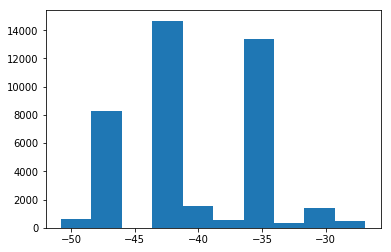

In [29]:
plt.hist(cons_conf_idx)
plt.show()

## Euribor 3 month rate (euribor3m)

**daily indicator (numeric)**

In [30]:
euribor3m = df['euribor3m']
euribor3m.describe()

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

In [31]:
euribor3m.median()

4.857

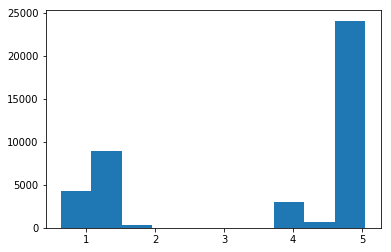

In [32]:
plt.hist(euribor3m)
plt.show()

## Number of employees (nr.employed)

**quarterly indicator (numeric)**

In [33]:
nr_employed = df['nr.employed']
nr_employed.describe()

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

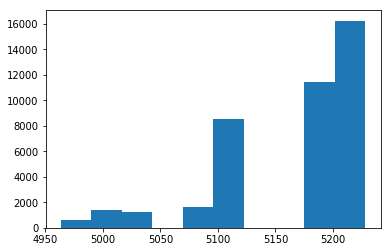

In [35]:
plt.hist(nr_employed)
plt.show()

In [34]:
nr_employed.value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64